In [1]:
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits(n_class=2, as_frame=True)

In [4]:
digits.data=digits.data/16.0


In [5]:
digits.data.shape

(360, 64)

In [37]:
digits.data.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
355,0.0,0.0,0.0625,0.75,0.6250,0.1875,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0625,0.4375,0.750,0.6250,0.0000,0.0,1
356,0.0,0.0,0.5000,0.75,0.6875,0.3750,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2500,0.6875,0.750,0.4375,0.0000,0.0,1
357,0.0,0.0,0.3125,1.00,0.6250,0.0000,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2500,0.9375,1.000,0.5000,0.0625,0.0,0
358,0.0,0.0,0.3750,0.75,0.7500,0.3750,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1250,0.6875,0.625,0.2500,0.0000,0.0,1
359,0.0,0.0,0.3750,1.00,0.8125,0.6875,0.0625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.3750,1.0000,0.875,0.3750,0.0000,0.0,0


In [7]:
r=digits.data.iloc[200,:]

In [7]:
uu=digits.target.values


In [8]:
digits.data['target']=uu

In [11]:
x=np.asarray(digits.data.iloc[1,:-1])
x=x.reshape(8,8)

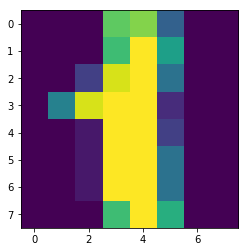

In [12]:
plt.imshow(x)

In [13]:
from torch.utils.data import DataLoader,Dataset
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [14]:
class Siamdata(Dataset):
    def __init__(self,train_df):
        self.train_df=train_df
      
    def __len__(self):
        return(len(self.train_df))
    
    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        i=random.randint(0,359)
        j=random.randint(0,359)
        img1=self.train_df.iloc[i,:]
        img2=self.train_df.iloc[j,:]
        
                                
        IMG1=img1.iloc[0:-1]
        IMG2=img2.iloc[0:-1]
        IMG1=np.array([IMG1])
        IMG2=np.array([IMG2])
        IMG1 = IMG1.astype('float')
        IMG2 = IMG2.astype('float')
                         
        return  IMG1,IMG2,torch.from_numpy(np.array([img1['target']==img2['target']],dtype=np.float32))                

if same image return 1
else 0

In [15]:
data=Siamdata(digits.data)

vis_dataloader = DataLoader(data,
                        shuffle=True,
                        num_workers=0,
                        batch_size=1)
dataiter = iter(vis_dataloader)


next(dataiter)

[tensor([[[0.0000, 0.0000, 0.3125, 0.7500, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.8750, 0.6250, 0.8750, 0.7500, 0.0000, 0.0000,
           0.0000, 0.1250, 1.0000, 1.0000, 0.5000, 0.6875, 0.1250, 0.0000,
           0.0000, 0.1875, 1.0000, 0.6875, 0.0000, 0.5625, 0.1875, 0.0000,
           0.0000, 0.3125, 0.7500, 0.1250, 0.0000, 0.7500, 0.2500, 0.0000,
           0.0000, 0.0625, 0.7500, 0.0000, 0.0000, 0.8125, 0.1875, 0.0000,
           0.0000, 0.0000, 0.8125, 0.3750, 0.5000, 0.8125, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1875, 0.8750, 0.7500, 0.1875, 0.0000, 0.0000]]],
        dtype=torch.float64),
 tensor([[[0.0000, 0.0000, 0.0625, 0.9375, 0.9375, 0.1250, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.7500, 1.0000, 0.4375, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.8750, 1.0000, 0.3125, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.8125, 1.0000, 0.1250, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1250, 1.0000, 0.8125, 0.0000, 0.0000, 

In [16]:
len(data)

360

In [17]:
from torch import nn
import torch.nn.functional as F

In [20]:
class Siamodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(64,16)
        self.fc2=nn.Linear(16,8)
        
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        return x
    
        
model = Siamodel()
model        
        

Siamodel(
  (fc1): Linear(in_features=64, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
)

In [56]:
class Siamese(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=Siamodel()
        self.fc1 = nn.Linear(8,1)
    def forward(self,x1,x2):
        vec1=self.model(x1)
        vec2=self.model(x2)
        feat=torch.abs(torch.add(vec1,-vec2,alpha=1))
        feat=self.fc1(feat)              
        p=F.sigmoid(feat)
        return p

In [57]:
model1 = Siamese()
model1

Siamese(
  (model): Siamodel(
    (fc1): Linear(in_features=64, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=8, bias=True)
  )
  (fc1): Linear(in_features=8, out_features=1, bias=True)
)

In [63]:
criterion=nn.BCELoss()
optimizer = optim.SGD(model1.parameters(), lr=0.003)

In [71]:
epochs=100

In [65]:
vis_dataloader = DataLoader(data,
                        shuffle=True,
                        num_workers=0,
                        batch_size=1)

In [66]:
model1=model1.float()


In [72]:
for e in range(epochs):
    run_loss=0
    for image1,image2,labels in vis_dataloader:
        optimizer.zero_grad()
        output = model1(image1.float(),image2.float())
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        run_loss += loss.item()
    else:
        print(f"Training loss: {run_loss/len(vis_dataloader)}")
        
        
        

Training loss: 0.6716541359821956
Training loss: 0.6439513797561328
Training loss: 0.6073124101592435
Training loss: 0.5201237010045184
Training loss: 0.4251297257426712
Training loss: 0.3519780771496395
Training loss: 0.3236306125919024
Training loss: 0.2577373212720785
Training loss: 0.2500615296885371
Training loss: 0.21210288017367324
Training loss: 0.1991351573728025
Training loss: 0.1663628040631819
Training loss: 0.16683346522558068
Training loss: 0.15609791161647688
Training loss: 0.1469052106038564
Training loss: 0.14204560770239266
Training loss: 0.12735689992809462
Training loss: 0.11398752469879886
Training loss: 0.10777348400507536
Training loss: 0.09341981697491267
Training loss: 0.10116755246158896
Training loss: 0.08718749591563311
Training loss: 0.08958140424478592
Training loss: 0.07966299410133312
Training loss: 0.07296807076781989
Training loss: 0.07647511704255723
Training loss: 0.06831840440863743
Training loss: 0.07257129262887045
Training loss: 0.070912973207628

Inference

In [79]:
model1.eval()

dataiter = iter(vis_dataloader)
image1,image2,labels = dataiter.next()


# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model1.forward(image1.float(),image2.float())

In [80]:
 output

tensor([[[0.9710]]])

In [81]:
image1,image2,labels

(tensor([[[0.0000, 0.0000, 0.0000, 0.5625, 0.9375, 0.3750, 0.0000, 0.0000,
           0.0000, 0.0000, 0.3125, 0.9375, 1.0000, 0.9375, 0.0000, 0.0000,
           0.0000, 0.0000, 0.9375, 0.9375, 0.2500, 1.0000, 0.1875, 0.0000,
           0.0000, 0.1250, 0.8750, 0.3125, 0.0000, 0.7500, 0.5000, 0.0000,
           0.0000, 0.3750, 0.8125, 0.0000, 0.0625, 0.8750, 0.3750, 0.0000,
           0.0000, 0.0625, 0.6250, 0.8750, 0.9375, 1.0000, 0.1875, 0.0000,
           0.0000, 0.0000, 0.1875, 1.0000, 1.0000, 0.8750, 0.0625, 0.0000,
           0.0000, 0.0000, 0.0000, 0.5625, 0.8125, 0.3125, 0.0000, 0.0000]]],
        dtype=torch.float64),
 tensor([[[0.0000, 0.0000, 0.4375, 0.8125, 0.5000, 0.2500, 0.0000, 0.0000,
           0.0000, 0.0625, 0.9375, 0.6875, 0.5625, 0.9375, 0.1250, 0.0000,
           0.0000, 0.2500, 1.0000, 0.3750, 0.0000, 0.5000, 0.4375, 0.0000,
           0.0000, 0.2500, 0.6250, 0.0000, 0.0000, 0.4375, 0.5000, 0.0000,
           0.0000, 0.2500, 0.6250, 0.0000, 0.0000, 0.5000, 0.5000, 

In [82]:
torch.save(model1.state_dict(), 'checkpoint1.pth')